video_name       1CV12_16_R_#107
label_name                   G04
label                          7
first_frame                 1154
last_frame                  1207
number_frames                 54
Name: 1610, dtype: object


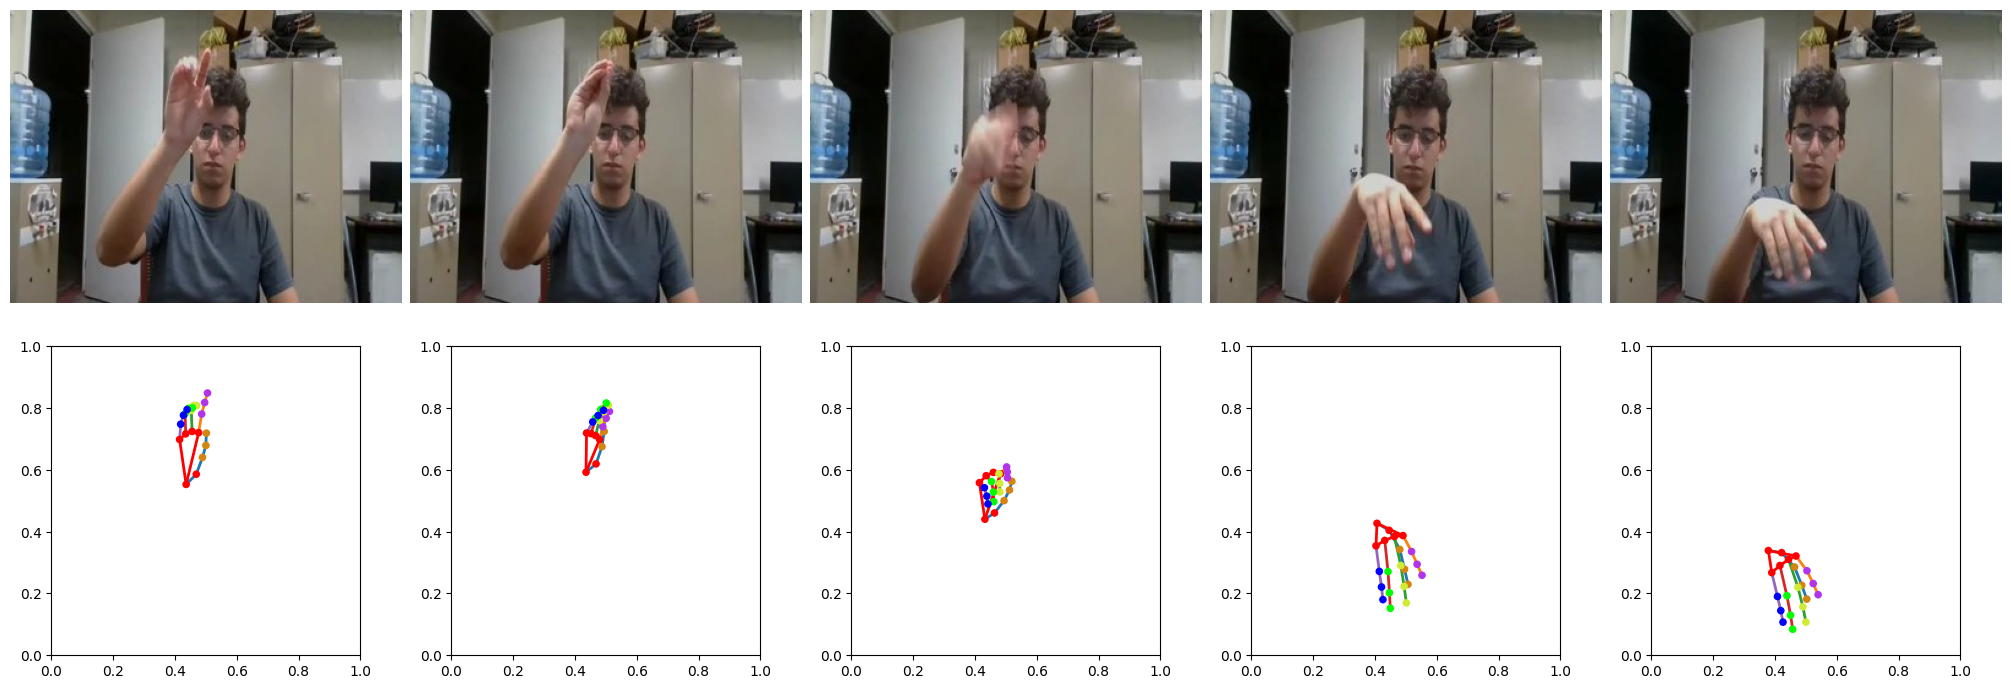

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

CONNECTIONS = [
    [(0, 4), (5, 8), (9, 12), (13, 16), (17, 20)],
    [(0, 5), (0, 17), (5, 9), (9, 13), (13, 17)],
]
SCATTER_COLORS = [
    "#ff0000",
    "#ff0000",
    "#d68411",
    "#d68411",
    "#d68411",
    "#ff0000",
    "#b134eb",
    "#b134eb",
    "#b134eb",
    "#ff0000",
    "#cfeb34",
    "#cfeb34",
    "#cfeb34",
    "#ff0000",
    "#00ff00",
    "#00ff00",
    "#00ff00",
    "#ff0000",
    "#0000ff",
    "#0000ff",
    "#0000ff",
]

NUMBER_FRAMES = 5

def plot_landmarks(x: np.ndarray, y: np.ndarray, ax: plt.Axes):
    for connection in CONNECTIONS[0]:
        ax.plot(
            x[connection[0] : connection[1] + 1],
            y[connection[0] : connection[1] + 1],
            zorder=0,
            linewidth=2,
        )
    for connection in CONNECTIONS[1]:
        ax.plot(
            [x[connection[0]], x[connection[1]]],
            [y[connection[0]], y[connection[1]]],
            c="#ff0000",
            zorder=0,
            linewidth=2,
        )

    ax.scatter(x, y, c=SCATTER_COLORS, s=20)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")
    ax.axhline(0, color="black", linewidth=.5, alpha=.4, linestyle='--')
    ax.axvline(0, color="black", linewidth=.5, alpha=.4, linestyle='--')

annotations = pd.read_csv("/mnt/RESOURCES/josemanuelbravo/GestureRecognitionSystem/data/IPN_Hand/annotations/Annot_TrainList.txt")

gesture = annotations.iloc[1610]
video_path = os.path.join("/mnt/RESOURCES/josemanuelbravo/GestureRecognitionSystem/data/IPN_Hand/frames/all_frames", gesture["video_name"])
landmarks_path = os.path.join("/home/josemanuelbravo/Escritorio/GestureRecognitionSystem/features/IPN_Hand/pose_features_w_interp")

step = (gesture["last_frame"] - gesture["first_frame"]) / NUMBER_FRAMES
landmarks = pd.read_csv(os.path.join(landmarks_path, f"{gesture['video_name']}_poses_landamarks.csv")).to_numpy()

fig = plt.figure(figsize=(20,7), constrained_layout=True)
subfigs = fig.subfigures(nrows=2, ncols=1)

for i, subfig in enumerate(subfigs):
    axs = subfig.subplots(nrows=1, ncols=NUMBER_FRAMES)
    for j in range(NUMBER_FRAMES):
        ax = axs[j]
        frame = int(gesture["first_frame"] + j * step)
        if i == 0:
            img = cv2.imread(os.path.join(video_path, f"{gesture['video_name']}_{str(frame).rjust(6,'0')}.jpg"))
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax.axis("off")
        else:
            landmarks_frame = landmarks[frame-1, :]
            x = landmarks_frame[0::2]
            y = landmarks_frame[1::2]
            plot_landmarks(x, y, ax)





print(gesture)